<a href="https://colab.research.google.com/github/ckiekim/Colab/blob/main/01_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab 연습

In [1]:
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [2]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0


In [3]:
!head -n 3 /proc/meminfo

MemTotal:       13333596 kB
MemFree:        10491076 kB
MemAvailable:   12539192 kB


In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [5]:
!python --version

Python 3.6.9


In [6]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [7]:
from tensorflow import keras
keras.__version__

'2.4.0'

In [ ]:
print('한글')

한글


In [ ]:
!hostname

77c3bc091550


In [ ]:
!pwd

/content


In [ ]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Jan 20 17:27 .
drwxr-xr-x 1 root root 4096 Feb  1 04:45 ..
drwxr-xr-x 1 root root 4096 Jan 28 17:15 .config
drwxr-xr-x 1 root root 4096 Jan 20 17:27 sample_data


In [ ]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!cat sample*/R*

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


In [5]:
!ls -l sam*

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jan 20 17:27 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jan 20 17:27 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jan 20 17:27 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jan 20 17:27 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [1]:
import numpy as np
import pandas as pd
mnist = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
mnist.shape

(20000, 785)

In [3]:
mnist.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,4.470200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.010800,0.010800,0.00045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012400,0.028450,0.058300,0.065500,0.127550,...,3.713850,2.627100,1.718400,1.020050,0.553200,0.247400,0.097750,0.020750,0.00140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000350,0.010650,0.036050,0.088300,0.112300,0.158500,0.276900,0.406050,0.546800,0.572050,0.696200,0.671650,0.54590,0.36630,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,2.892755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070711,1.527351,1.527351,0.06364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.233338,1.986539,3.473241,3.100708,5.002952,...,26.814446,22.334028,18.262349,14.000437,10.463161,6.750598,4.079011,1.322084,0.19799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049497,1.095078,2.220765,3.900047,4.749833,5.406638,7.005125,8.718932,10.378882,10.254588,11.457106,11.296983,10.05708,8.25534,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist.iloc[:, 1:], mnist.iloc[:, 0], stratify=mnist.iloc[:, 0], 
    test_size=0.25, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 784), (5000, 784), (15000,), (5000,))

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((15000, 784), (5000, 784))

In [8]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [9]:
params = {
    'C': [0.1, 1, 10]
    #'C': [5, 10, 20]
}

In [10]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5, 
                       verbose=1, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.1min finished


최고 평균 정확도: 0.9689
최적 파라미터: {'C': 10}


In [28]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9756

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
X_test.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
11317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


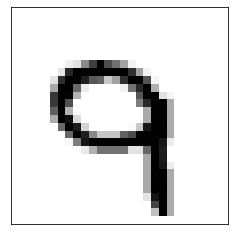

In [31]:
digit = X_test.iloc[1000,:].values.reshape(28,28)
plt.figure(figsize=(4,4))
plt.xticks([]); plt.yticks([])
plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest');